<a href="https://colab.research.google.com/github/tug98850/Data-Analysis/blob/master/aerospace_defense_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

file = open("military_percent.csv", "r")
data = list(csv.reader(file))
headers = data[0]

#turn into a df
df = pd.read_csv('military_percent.csv')
df = df.rename(columns={'\ufeffCountry Name': 'Country Name'})
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [0]:
israel = df[df['Country Name'] == 'Israel']
israel

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
113,Israel,ISR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,7.460248,7.865016,9.160792,9.753574,8.984627,8.569154,...,6.748355,6.23822,6.237331,6.04196,5.915451,5.992281,5.670257,4.654133,4.725543,NaN


In [0]:
#create a new DF for israel that has col years, military_exp
israel[israel.columns[4:]]
#years = pd.Series(israel[israel.columns[4:]].columns)
new_israel_df = israel[israel.columns[4:]].iloc[0]
new_israel_df = pd.DataFrame(new_israel_df)

#renaming 113 to military_exp as new column name
new_israel_df = new_israel_df.rename(columns={113:'military_exp'})

#converting the index into datetime data type
new_israel_df.index = pd.to_datetime(new_israel_df.index)

new_israel_df

,military_exp
1960-01-01,7.460248
1961-01-01,7.865016
1962-01-01,9.160792
1963-01-01,9.753574
1964-01-01,8.984627
1965-01-01,8.569154
1966-01-01,9.434673
1967-01-01,15.442514
1968-01-01,17.428015
1969-01-01,19.089317


Text(0, 0.5, 'Military spending as % of GDP')

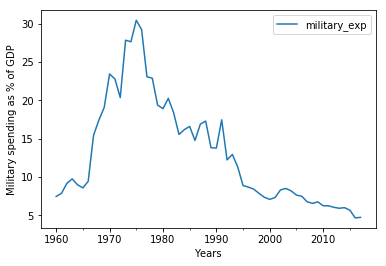

In [0]:
israel_spending = new_israel_df.plot()
israel_spending.set_xlabel("Years")
israel_spending.set_ylabel("Military spending as % of GDP")

## Insight
Israel's military expenditure as a % to their GDP increases drastically from the period between 1960 to 1975. The trend declined from 1975 onwards. 

There is also a small spike in the period around 1990. 

## Recommendation

As this trend is observed, the total demand for defense products domestically is decreasing but as observed from 2010 to present, this trend is most likely to stay around the target of 5%. 

The spike during mid 1970s to an extend reflect the political tensions with its Middle Eastern neighbor. Small war with Egypt, Syria and Jordan in 1973.

In [0]:
#axis = 1 -> sum up every row
#for loc, the item before , is to select all rows and
# 1960:2017 means to select only rows from 1960 up to and including
# 2017 since 2018 does not have any data yet

df['total_mil_exp'] = df.loc[:, '1960':'2017'].sum(axis = 1, skipna = True) 
df['no_data_years'] = df.loc[:, '1960':'2017'].isnull().sum(axis=1)

#subtract from 57 because there are 58 years from 1960 to 2017
df['yearly_avg'] = df['total_mil_exp']/(58 - df['no_data_years'])
df.index = df['Country Name']
df['yearly_avg']

#find top 10 countries with the highest yearly average military
#expenditure
df.nlargest(10,'yearly_avg')


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,total_mil_exp,no_data_years,yearly_avg
Country Name,,,,,,,,,,,,,,,,,,,,,
Eritrea,Eritrea,ERI,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.996965,47,22.636088
Oman,Oman,OMN,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.156616,14.806981,13.514476,14.384197,15.956153,12.072720,NaN,776.037016,11,16.511426
Israel,Israel,ISR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,7.460248,7.865016,9.160792,9.753574,8.984627,8.569154,...,6.041960,5.915451,5.992281,5.670257,4.654133,4.725543,NaN,758.011964,0,13.069172
Saudi Arabia,Saudi Arabia,SAU,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,5.902698,5.966305,7.690089,...,7.697721,9.003995,10.713586,13.496225,9.906483,10.288671,NaN,571.247249,7,11.200926
Jordan,Jordan,JOR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,20.396745,16.507077,18.145500,17.118513,14.842176,13.409905,...,4.760647,4.301179,4.323213,4.304474,4.577900,4.797788,NaN,606.875030,0,10.463363
Kuwait,Kuwait,KWT,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.413742,3.271525,3.585665,5.030730,5.840997,5.751166,NaN,447.709862,12,9.732823
Syrian Arab Republic,Syrian Arab Republic,SYR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,10.517747,9.544917,13.469985,NaN,8.642973,8.877953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.381385,8,9.727628
Qatar,Qatar,QAT,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.800113,38,9.040006
Middle East & North Africa,Middle East & North Africa,MEA,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.802381,5.022533,5.407562,4.820345,5.194947,5.921928,...,4.752693,5.310254,5.784494,6.703155,5.554966,5.723823,NaN,398.124053,3,7.238619


In [0]:
#find top 10 countries with the highest average industry spending -> i.e potential customers
#this excludes any country that has more than 10 years with no data

top_10 = df[df['no_data_years'] <= 10].nlargest(10,'yearly_avg')
top_10


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,total_mil_exp,no_data_years,yearly_avg
Country Name,,,,,,,,,,,,,,,,,,,,,
Israel,Israel,ISR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,7.460248,7.865016,9.160792,9.753574,8.984627,8.569154,...,6.041960,5.915451,5.992281,5.670257,4.654133,4.725543,NaN,758.011964,0,13.069172
Saudi Arabia,Saudi Arabia,SAU,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,5.902698,5.966305,7.690089,...,7.697721,9.003995,10.713586,13.496225,9.906483,10.288671,NaN,571.247249,7,11.200926
Jordan,Jordan,JOR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,20.396745,16.507077,18.145500,17.118513,14.842176,13.409905,...,4.760647,4.301179,4.323213,4.304474,4.577900,4.797788,NaN,606.875030,0,10.463363
Syrian Arab Republic,Syrian Arab Republic,SYR,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,10.517747,9.544917,13.469985,NaN,8.642973,8.877953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,486.381385,8,9.727628
Middle East & North Africa,Middle East & North Africa,MEA,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.802381,5.022533,5.407562,4.820345,5.194947,5.921928,...,4.752693,5.310254,5.784494,6.703155,5.554966,5.723823,NaN,398.124053,3,7.238619
Arab World,Arab World,ARB,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,4.777088,4.767768,5.403068,3.926619,4.852327,6.164718,...,5.132832,5.839654,6.389152,7.506481,6.203627,6.423243,NaN,380.985883,5,7.188413
"Egypt, Arab Rep.","Egypt, Arab Rep.",EGY,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,6.675479,8.664688,10.328390,10.117435,...,1.789665,1.587277,1.472667,1.554924,1.504512,1.285924,NaN,356.549382,2,6.366953
Lebanon,Lebanon,LBN,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,3.656250,3.888731,...,3.984597,4.099312,4.624535,4.412125,5.033667,4.513849,NaN,288.614982,7,5.659117
United States,United States,USA,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,8.619593,8.775733,8.944079,8.465056,7.716869,7.206953,...,4.238733,3.832514,3.499702,3.289634,3.222135,3.149222,NaN,305.861869,0,5.273480


## Insight
From the above data table, we observe that Israel and countries at are in the region of Middle East on average has the highest military expenditure as a percentage of the GDP.

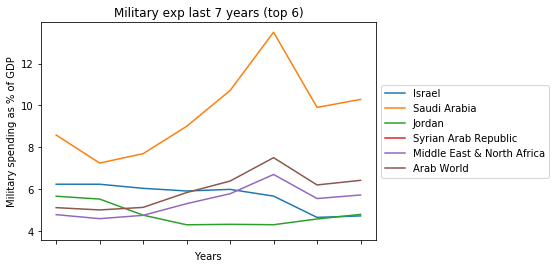

In [0]:
#looking at top 5's (top as in yearly average from 1960 to 2017) 
#spending trend in the last 2 decades
top_5 = df[df['no_data_years'] <= 10].nlargest(6,'yearly_avg')
#top_5.loc[:, "2000" : "2017"].T.plot()

f = plt.figure()

plt.title('Military exp last 7 years (top 6)', color='black')
top_5.loc[:, "2010" : "2017"].T.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Years')
plt.ylabel('Military spending as % of GDP')
plt.show()


## Insight
In this above graph, we observe that the spending trends for the top 6 yearly average spenders have upward trends in the last 7 years. 

Syrian is not shown because there are no available data from 2010 to 2017.

Israel's spending trend decreases slowly over the last 7 years. The spending percentage stays approximately around 5%. 

## Recommendation
From this graph, we see that the top spenders are also countries or areas that historically have had a lot of tension with Israel. Given the fact that their spendings are trending upwards, this might create even more political tension within the region. 

In times of political tension, states tend to increase their military spending. This means that if this trend of increasing military spending by Israel's neighbor continues, this might cause Israel to increase military spending as well. In effect, that would generate more demands domestically and increases Elbit's chance for growth. 

In [0]:
#Analysis on whether Israel's neighbor increase in defense
#spending has some sort of correlation to its extreme increase in defense
#spending from 1960 to mid 1970s

In [0]:
#Analyzing the top spenders within the last decade
#divide 10 for 10 years
df_last_decade = pd.DataFrame()

#the result of the next two lines are pandas Series so they can be put int as
#columns
df_last_decade['military exp'] = df.loc[:, '2007':'2017'].sum(axis = 1, skipna = True)
df_last_decade['no_data_years'] = df.loc[:, '2007':'2017'].isnull().sum(axis=1)

df_last_decade['yearly_avg'] = df_last_decade['military exp']/(10 - df_last_decade['no_data_years'])
df_last_decade[df_last_decade['no_data_years'] == 0].nlargest(10, 'yearly_avg')

,military exp,no_data_years,yearly_avg
Country Name,,,
Oman,132.192145,0,13.219214
Saudi Arabia,102.441506,0,10.244151
Israel,65.542595,0,6.554260
Arab World,61.776935,0,6.177694
Jordan,57.059214,0,5.705921
Middle East & North Africa,56.918343,0,5.691834
Algeria,50.901286,0,5.090129
Lebanon,47.506956,0,4.750696
Georgia,45.846204,0,4.584620


## Insight
The top 10 spenders in the last decade are primarily countries in the Middle East region.


## Recommendation
Potential room for growth

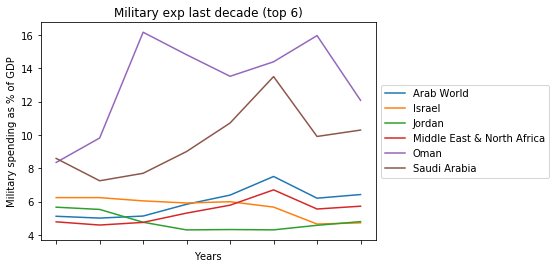

In [0]:
#looking at top 5's (top as in yearly average from 1960 to 2017) 
#spending trend in the last 2 decades
top_6_countries = df_last_decade[df_last_decade['no_data_years'] == 0].nlargest(6,'yearly_avg').index
df_top_6 = df[df.index.isin(top_6_countries)].loc[:, "2010" : "2017"].T

f = plt.figure()

plt.title('Military exp last decade (top 6)', color='black')
df_top_6.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Years')
plt.ylabel('Military spending as % of GDP')
plt.show()



In [0]:
#Interested in countries that has no more than 10 missing data years
time_df = df[df['no_data_years'] <= 10]
time_df = time_df.loc[:, '1960':'2017']
time_df = time_df.fillna(df.mean(axis=0))
#time_df.index
#time_df.T.corr()

#getting correlation matrix containing pairwise correlation between all the rows
#the rows are the countries
correlation_matrix = time_df.T.corr()
correlation_matrix[correlation_matrix.index == 'Israel'].T.nlargest(20,'Israel')
#time_df[time_df['Country Name'] == 'israel'].corr(time)

Country Name,Israel
Country Name,
Israel,1.000000
Middle East & North Africa (excluding high income),0.892688
Middle East & North Africa (IDA & IBRD countries),0.892688
Philippines,0.874908
IDA blend,0.865775
Lower middle income,0.854914
"Egypt, Arab Rep.",0.844525
IBRD only,0.833467
Middle income,0.830698


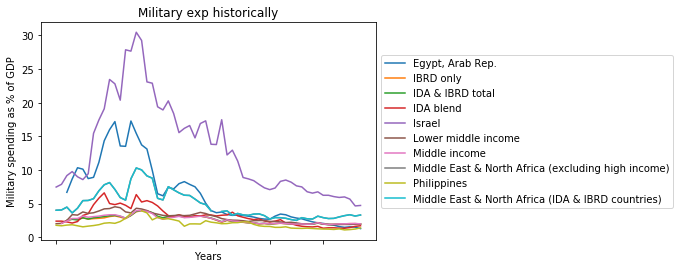

In [0]:
#Graphing the trends of top 10 countries/areas that has the highest correlation
#coefficient to Israel
top_10_countries = correlation_matrix[correlation_matrix.index == 'Israel'].T.nlargest(10,'Israel').index
df_top_10 = df[df.index.isin(top_10_countries)].loc[:, '1960':'2017'].T
#df_top_10

f = plt.figure()

plt.title('Military exp historically', color='black')
df_top_10.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Years')
plt.ylabel('Military spending as % of GDP')
plt.show()


Source: https://www.businessinsider.com/top-countries-exporting-weapons-arms-sales-2018-3#9-italy-2

According to this source, Israel's largest clients are India (49%), Azerbaijan (13%) and Vietnam (13%)

Elbit's anual report: http://ir.elbitsystems.com/financial-information/annual-reports

Read this and understand what are the targeting market segments